### **0. Set-up**

In [33]:
# Import libraries and utils
%run '../../utils.ipynb'

In [34]:
# Load NL predicted
raw_nl_pred = pd.read_csv("../../../data/text-embedding-3-small/nl.csv")

In [35]:
# Load EN predicted
raw_en_pred = pd.read_csv("../../../data/text-embedding-3-small/en.csv")

# Drop rows in EN SimLex that are missing in NL SimLex
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'awful')].index)
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'terrible')].index)

# Reset index
raw_en_pred = raw_en_pred.reset_index(drop=True)

In [36]:
# Show results
raw_nl_pred

,word1,word2,similarity_score
0,oud,nieuw,0.30
1,slim,intelligent,0.27
2,hard,moeilijk,0.47
3,gelukkig,vrolijk,0.57
4,hard,stoer,0.24
...,...,...,...
992,samenvoegen,verwerven,0.51
993,sturen,bijwonen,0.49
994,verzamelen,bijwonen,0.52
995,opnemen,intrekken,0.57


In [37]:
# Show results
raw_en_pred

,word1,word2,similarity_score
0,old,new,0.51
1,smart,intelligent,0.57
2,hard,difficult,0.58
3,happy,cheerful,0.60
4,hard,easy,0.45
...,...,...,...
992,join,acquire,0.32
993,send,attend,0.47
994,gather,attend,0.59
995,absorb,withdraw,0.43


### **1. Data Processing**

In [38]:
# Copy dataframe
nl_pred = raw_nl_pred.copy()

# Normalize cosine similarity to to 0-10 scale
nl_pred['scaled_similarity_score'] = 5 * (nl_pred['similarity_score'] + 1)

# Rename columns
nl_pred = nl_pred.rename(columns={'scaled_similarity_score': 'nl_pred_sl'})

# Select columns
nl_pred = nl_pred[['word1', 'word2', 'nl_pred_sl']]

In [39]:
# Copy dataframe
en_pred = raw_en_pred.copy()

# Normalize cosine similarity to to 0-10 scale
en_pred['scaled_similarity_score'] = 5 * (en_pred['similarity_score'] + 1)

# Rename columns
en_pred = en_pred.rename(columns={'scaled_similarity_score': 'en_pred_sl'})

# Select columns
en_pred = en_pred[['word1', 'word2', 'en_pred_sl']]

In [40]:
# Concatenate NL and EN DataFrames
conc = pd.concat([nl_pred, en_pred], axis=1)

# Show results
conc

,word1,word2,nl_pred_sl,word1,word2,en_pred_sl
0,oud,nieuw,6.50,old,new,7.55
1,slim,intelligent,6.35,smart,intelligent,7.85
2,hard,moeilijk,7.35,hard,difficult,7.90
3,gelukkig,vrolijk,7.85,happy,cheerful,8.00
4,hard,stoer,6.20,hard,easy,7.25
...,...,...,...,...,...,...
992,samenvoegen,verwerven,7.55,join,acquire,6.60
993,sturen,bijwonen,7.45,send,attend,7.35
994,verzamelen,bijwonen,7.60,gather,attend,7.95
995,opnemen,intrekken,7.85,absorb,withdraw,7.15


### **2. Descriptive Statistics**

In [41]:
# Summary statistics SimLex-999
nl_pred_sl_summary = round(nl_pred['nl_pred_sl'].describe(), 2)
en_pred_sl_summary = round(en_pred['en_pred_sl'].describe(), 2)

# Add median SimLex-999
nl_pred_sl_summary['median'] = round(nl_pred['nl_pred_sl'].median(), 2)
en_pred_sl_summary['median'] = round(en_pred['en_pred_sl'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "nl_pred_sl": nl_pred_sl_summary,
    "en_pred_sl": en_pred_sl_summary
})

# Show results
summary_df

,nl_pred_sl,en_pred_sl
count,997.00,997.00
mean,7.16,7.30
std,0.68,0.58
min,5.55,5.60
25%,6.65,6.90
50%,7.15,7.25
75%,7.60,7.65
max,9.60,9.15
median,7.15,7.25


#### **2.1. SimLex-999**

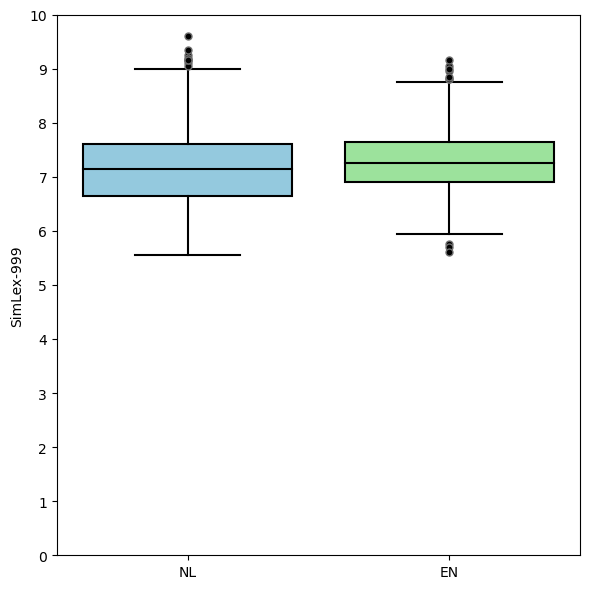

In [42]:
# Rename columns and copy
renamed_nl_pred_sl = nl_pred.rename(columns={"nl_pred_sl": "SimLex-999"}).copy()
renamed_en_pred_sl = en_pred.rename(columns={"en_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_nl_pred_sl['Score'] = 'NL'
renamed_en_pred_sl['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sl, renamed_en_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

#### **3.1. SimLex-999**

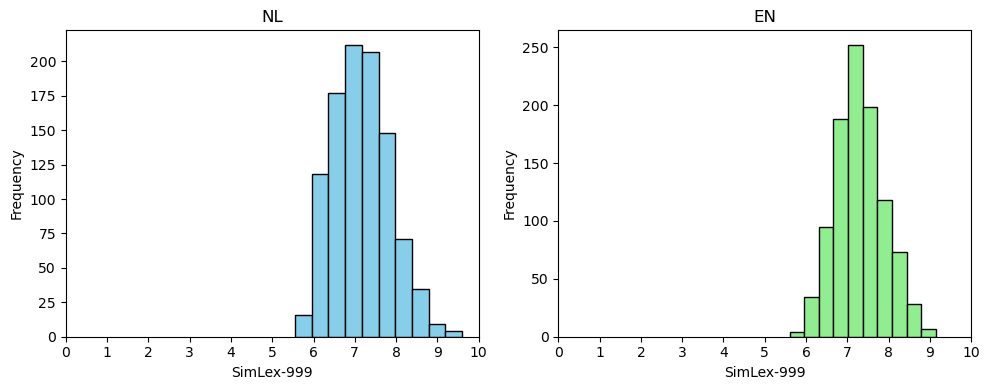

In [43]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. NL**

In [44]:
# Count outliers
print_outlier_counts(nl_pred)

Outliers in nl_pred_sl: 9


In [45]:
# Row outliers
print_outlier_data(nl_pred, 'nl_pred_sl')


Outliers in nl_pred_sl:
            word1         word2  nl_pred_sl
109    echtgenote    echtgenoot        9.25
125       actrice        acteur        9.35
141          taxi         taxis        9.15
209   afwezigheid  aanwezigheid        9.60
569  gelukkigheid         geluk        9.20
777     luisteren         horen        9.10
793   aanmoedigen   ontmoedigen        9.05
838     deelnemen       meedoen        9.15
886   verkondigen   aankondigen        9.15


#### **4.2. EN**

In [46]:
# Count outliers
print_outlier_counts(en_pred)

Outliers in en_pred_sl: 10


In [47]:
# Row outliers
print_outlier_data(en_pred, 'en_pred_sl')


Outliers in en_pred_sl:
              word1       word2  en_pred_sl
9             weird     strange        8.95
16            large        huge        8.80
127           movie        film        9.05
296        boundary      border        8.80
500  administration  management        8.85
721          flower   endurance        5.75
731          liquor     century        5.70
739            cent        wife        5.60
780          vanish   disappear        9.00
794         achieve  accomplish        9.15


#### **4.3. Add to Summary**

In [48]:
# Calculate outliers
outliers_nl_pred_sl = calculate_outliers(nl_pred, 'nl_pred_sl')
outliers_en_pred_sl = calculate_outliers(en_pred, 'en_pred_sl')

# Count outliers
count_outliers_nl_pred_sl = outliers_nl_pred_sl.shape[0]
count_outliers_en_pred_sl = outliers_en_pred_sl.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_nl_pred_sl, count_outliers_en_pred_sl], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,nl_pred_sl,en_pred_sl
count,997.00,997.00
mean,7.16,7.30
std,0.68,0.58
min,5.55,5.60
25%,6.65,6.90
50%,7.15,7.25
75%,7.60,7.65
max,9.60,9.15
median,7.15,7.25
outliers,9.00,10.00


### **5. Evaluation Metrics**

#### **5.1. Spearmans's Rank Correlation**

##### **5.1.1. NL SimLex-999 vs EN SimLex-999**

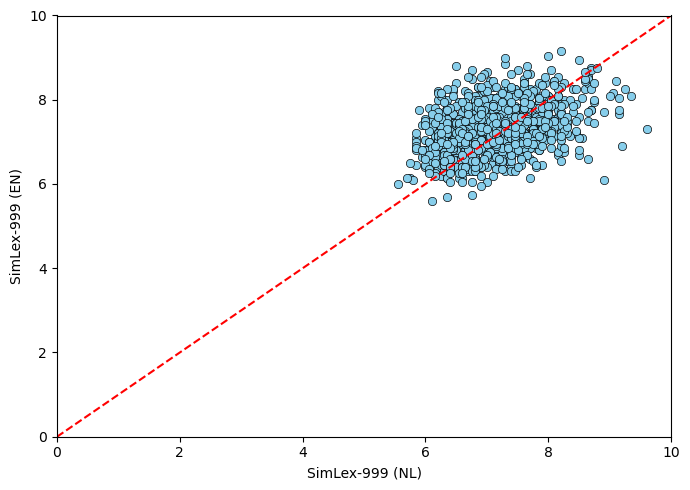

In [49]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sl', 'en_pred_sl', 'SimLex-999 (NL)', 'SimLex-999 (EN)', 0, 10, 0, 10)

In [55]:
conc

,word1,word2,nl_pred_sl,word1,word2,en_pred_sl
0,oud,nieuw,6.50,old,new,7.55
1,slim,intelligent,6.35,smart,intelligent,7.85
2,hard,moeilijk,7.35,hard,difficult,7.90
3,gelukkig,vrolijk,7.85,happy,cheerful,8.00
4,hard,stoer,6.20,hard,easy,7.25
...,...,...,...,...,...,...
992,samenvoegen,verwerven,7.55,join,acquire,6.60
993,sturen,bijwonen,7.45,send,attend,7.35
994,verzamelen,bijwonen,7.60,gather,attend,7.95
995,opnemen,intrekken,7.85,absorb,withdraw,7.15


In [50]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'nl_pred_sl', 'en_pred_sl')

Spearman's Rank correlation: 0.3575
P-value: 2.0013738941103335e-31
The correlation is statistically significant.



#### **5.2. Mean Square Error (MSE)**

In [51]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.52


#### **5.3. Mean Absolute Error (MAE)**

In [52]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.57
